# Walmart Store Sales Forecasting 

This is a Kaggle compete competition. The link of the competition given below. https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview

## Business Problem

<p>Walmart is a supermarket chain in the USA. Currently, they have opened their stores all over the world.</p>
<p>Predicting future sales for a company is one of the most important aspects of strategic planning. This number is very important to Walmart. If they know what will be sales number of a given store and the department in the upcoming week then they can store that the product of that department more efficiently. Based on the sales number they can take an informed decision that can help to grow their business. The future sales number also help to recruit contract employee based on sales.  It will also help to a Walmart store to work more efficient way.</p>

## The Big Question - Why we need Machine Learning approach?

Walmart is one of the biggest retail chains in the world. They have multiple stores in various location across the world. There may have different sales pattern in different store placed in different locations. To identify this pattern and predict future sales, we should have a complete solution. Here, we can take a machine learning approach to create this complete solution. 
If we have a trained model, predicting the sales number of a store shouldn’t be a tedious task to do. It will save lots of human time.


## Performance Matric

The performance matrix of this competition is the Weighted Mean Absolute Error(WMAE). As per the Kaggle page, the weight of the week which has a holiday is 5 otherwise 1. That means Walmart is more focused on the holiday week and they want to have less error on that week. We also focus on that part as well and try to reduce the error.

In [2]:
!pip install tabulate

In [3]:
import numpy as np
import pandas as pd
import math

from datetime import datetime

import matplotlib.pylab as plt
import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns
import random
from tabulate import tabulate

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Datasets

1. train.csv/test.csv
2. stores.csv
3. features.csv

In [4]:
#Sales Data
train_data = pd.read_csv("train/train.csv")
test_data = pd.read_csv("test/test.csv")

#Features.csv
feature_data = pd.read_csv("features.csv")

#Stores.csv
store_data = pd.read_csv("stores.csv")

### Train data

In [15]:
print(train_data.shape)
train_data.head()

(421570, 5)


Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

### Test Data

In [16]:
print(test_data.shape)
test_data.head()

(115064, 4)


Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

### Features

In [17]:
print(feature_data.shape)
feature_data.head()

(8190, 12)


Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [5]:
#remove IsHoliday as It is also present in the train.csv and test.csv
feature_data.drop("IsHoliday", axis=1, inplace=True)
feature_data.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0        NaN        NaN        NaN  211.096358         8.106  
1        NaN        NaN        NaN  211.242170         8.106  
2        NaN        NaN        NaN  211.289143         8.106  
3        NaN        NaN        NaN  211.319643         8.106  
4        NaN        NaN        NaN  211.350143         8.106

### Store data

In [18]:
print(store_data.shape)
store_data.head()

(45, 3)


Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

## Data Preprosseing

### Join all the data

In [6]:
#Join The Train data
train_all = train_data.set_index("Store").join(store_data.set_index("Store"))
train_all.reset_index(inplace=True)
train_all = train_all.set_index(["Store","Date"]).join(feature_data.set_index(["Store","Date"]))
train_all.reset_index(inplace=True)

#Train data size
print(train_all.shape)
train_all.head()

(421570, 16)


Store        Date  Dept  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1  2010-02-05     1      24924.50      False    A  151315        42.31   
1      1  2010-02-05     2      50605.27      False    A  151315        42.31   
2      1  2010-02-05     3      13740.12      False    A  151315        42.31   
3      1  2010-02-05     4      39954.04      False    A  151315        42.31   
4      1  2010-02-05     5      32229.38      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.572        NaN        NaN        NaN        NaN        NaN   
2       2.572        NaN        NaN        NaN        NaN        NaN   
3       2.572        NaN        NaN        NaN        NaN        NaN   
4       2.572        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.096358         8.106  
2  211.096358         8.106  
3  211.096358         8.106  
4  211.096358         8.106

In [8]:
#Join The Test data
test_all = test_data.set_index("Store").join(store_data.set_index("Store"))
test_all.reset_index(inplace=True)
test_all = test_all.set_index(["Store","Date"]).join(feature_data.set_index(["Store","Date"]))
test_all.reset_index(inplace=True)

#Test data size
print(test_all.shape)
test_all.head()

(115064, 15)


Store        Date  Dept  IsHoliday Type    Size  Temperature  Fuel_Price  \
0      1  2012-11-02     1      False    A  151315        55.32       3.386   
1      1  2012-11-02     2      False    A  151315        55.32       3.386   
2      1  2012-11-02     3      False    A  151315        55.32       3.386   
3      1  2012-11-02     4      False    A  151315        55.32       3.386   
4      1  2012-11-02     5      False    A  151315        55.32       3.386   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
1    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
2    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
3    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
4    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   

   Unemployment  
0         6.573  
1         6.573  
2         6.573  
3         6.573  
4         6.573

## Basic Info of the training data

In [7]:
train_all.describe()

Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  150681.000000  111248.000000   
mean       60.090059       3.361027    7246.420196    3334.628621   
std        18.447931       0.458515    8291.221345    9475.357325   
min        -2.060000       2.472000       0.270000    -265.760000   
25%        46.680000       2.933000    2240.270000      41.600000   
50%        62.090000       3.452000    5347.450000     192.000000   
75%        74.280000       3.738000    9210.900000    1926.940000   
max       100.140000       4.468000   88646.760000  104519.540000   

           MarkDown3      MarkDown4      MarkDown5            CPI  \
count  137091.000000  134967.000000  151432.000000  421570.000000   
mean     1439.421384    3383.168256    4628.975079     171.201947   
std      9623.078290    6292.384031    5962.887455      39.159276   
min       -29.100000       0.220000     135.160000     126.064000   
25%         5.080000     504.220000    1878.440000     132.022667   
50%        24.600000    1481.310000    3359.450000     182.318780   
75%       103.990000    3595.040000    5563.800000     212.416993   
max    141630.610000   67474.850000  108519.280000     227.232807   

        Unemployment  
count  421570.000000  
mean        7.960289  
std         1.863296  
min         3.879000  
25%         6.891000  
50%         7.866000  
75%         8.572000  
max        14.313000

## Basic Info of the Test data

In [8]:
test_all.describe()

Store           Dept           Size    Temperature  \
count  115064.000000  115064.000000  115064.000000  115064.000000   
mean       22.238207      44.339524  136497.688921      53.941804   
std        12.809930      30.656410   61106.926438      18.724153   
min         1.000000       1.000000   34875.000000      -7.290000   
25%        11.000000      18.000000   93638.000000      39.820000   
50%        22.000000      37.000000  140167.000000      54.470000   
75%        33.000000      74.000000  202505.000000      67.350000   
max        45.000000      99.000000  219622.000000     101.950000   

          Fuel_Price      MarkDown1     MarkDown2      MarkDown3  \
count  115064.000000  114915.000000  86437.000000  105235.000000   
mean        3.581546    7689.216439   3734.051729    2403.088666   
std         0.239442   10698.760716   8323.495014   13767.939313   
min         2.872000   -2781.450000    -35.740000    -179.260000   
25%         3.431000    1966.460000    180.350000      15.100000   
50%         3.606000    4842.290000    742.590000      78.260000   
75%         3.766000    9439.140000   2735.670000     272.580000   
max         4.125000  103184.980000  71074.170000  149483.310000   

           MarkDown4      MarkDown5           CPI  Unemployment  
count  102176.000000  115064.000000  76902.000000  76902.000000  
mean     3356.219071    3922.681189    176.961347      6.868733  
std      7570.501545   19445.150745     41.239967      1.583427  
min         0.220000    -185.170000    131.236226      3.684000  
25%       155.460000    1309.300000    138.402033      5.771000  
50%       840.940000    2390.430000    192.304445      6.806000  
75%      3096.920000    4227.270000    223.244532      8.036000  
max     65344.640000  771448.100000    228.976456     10.199000

In [13]:
print(train_all.isnull().sum())
print("="*50)
print(test_all.isnull().sum())

Store                0
Date                 0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64
Store               0
Date                0
Dept                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [15]:
print(train_all.isnull().sum()*100.0/train_all.shape[0])
print("="*50)
print(test_all.isnull().sum()*100.0/test_all.shape[0])

Store            0.000000
Date             0.000000
Dept             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
dtype: float64
Store            0.000000
Date             0.000000
Dept             0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.129493
MarkDown2       24.879198
MarkDown3        8.542203
MarkDown4       11.200723
MarkDown5        0.000000
CPI             33.165890
Unemployment    33.165890
dtype: float64


### Observations
1. There are more than 60 percent markdowns are NULL. As per the competetion page Markdowns are available after Nov 2011. For the data before Nov 2011, the markdowns should be zero. 
2. For one third of the test data the CPI and Unemployment. These ware depends on the Location and time. But it cannot be changed drastically. So we can impute store location wise mean of these columns.

## Null Value Replacement

In [9]:
test_all['CPI'] = test_all['CPI'].fillna(train_all.groupby('Store')['CPI'].transform('mean'))
test_all['Unemployment'] = test_all['Unemployment'].fillna(train_all.groupby('Store')['Unemployment'].transform('mean'))

In [43]:
print(test_all.isnull().sum()*100.0/test_all.shape[0])

Store            0.000000
Date             0.000000
Dept             0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.129493
MarkDown2       24.879198
MarkDown3        8.542203
MarkDown4       11.200723
MarkDown5        0.000000
CPI              0.000000
Unemployment     0.000000
dtype: float64


In [10]:
#Replace the Markdowns with zero
train_all.fillna(0, inplace=True)
test_all.fillna(0, inplace=True)

In [46]:
print(train_all.isnull().sum()*100.0/train_all.shape[0])
print("="*50)
print(test_all.isnull().sum()*100.0/test_all.shape[0])

Store           0.0
Date            0.0
Dept            0.0
Weekly_Sales    0.0
IsHoliday       0.0
Type            0.0
Size            0.0
Temperature     0.0
Fuel_Price      0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown4       0.0
MarkDown5       0.0
CPI             0.0
Unemployment    0.0
dtype: float64
Store           0.0
Date            0.0
Dept            0.0
IsHoliday       0.0
Type            0.0
Size            0.0
Temperature     0.0
Fuel_Price      0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown4       0.0
MarkDown5       0.0
CPI             0.0
Unemployment    0.0
dtype: float64


In [ ]:
train_all.to_csv('train_all.csv', index=False);

In [11]:

train_all = pd.read_csv('train_all.csv');
train_all.head()

Store        Date  Dept  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1  2010-02-05     1      24924.50      False    A  151315        42.31   
1     35  2010-02-05     3      14612.19      False    B  103681        27.19   
2     35  2010-02-05     4      26323.15      False    B  103681        27.19   
3     35  2010-02-05     5      36414.63      False    B  103681        27.19   
4     35  2010-02-05     6      11437.81      False    B  103681        27.19   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.784        0.0        0.0        0.0        0.0        0.0   
2       2.784        0.0        0.0        0.0        0.0        0.0   
3       2.784        0.0        0.0        0.0        0.0        0.0   
4       2.784        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  
0  211.096358         8.106  
1  135.352461         9.262  
2  135.352461         9.262  
3  135.352461         9.262  
4  135.352461         9.262

In [ ]:
test_all.to_csv('test_all.csv', index=False);

In [12]:

test_all = pd.read_csv('test_all.csv');
test_all.head()

Store        Date  Dept  IsHoliday Type    Size  Temperature  Fuel_Price  \
0      1  2012-11-02     1      False    A  151315        55.32       3.386   
1      1  2012-11-02     2      False    A  151315        55.32       3.386   
2      1  2012-11-02     3      False    A  151315        55.32       3.386   
3      1  2012-11-02     4      False    A  151315        55.32       3.386   
4      1  2012-11-02     5      False    A  151315        55.32       3.386   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
1    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
2    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
3    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   
4    6766.44     5147.7      50.82     3639.9    2737.42  223.462779   

   Unemployment  
0         6.573  
1         6.573  
2         6.573  
3         6.573  
4         6.573

## Data Types 

In [12]:
train_all.dtypes

Store             int64
Date             object
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
train_all['Date'] = pd.to_datetime(train_all['Date'])
test_all['Date'] = pd.to_datetime(test_all['Date'])

In [14]:
train_all.dtypes

Store                    int64
Date            datetime64[ns]
Dept                     int64
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

In [63]:
#We are sorting all the data base on the weekly Sale.
train_all.sort_values('Date', inplace=True)

## Exploratory Data Analysis

### Store Type Vs Store Size

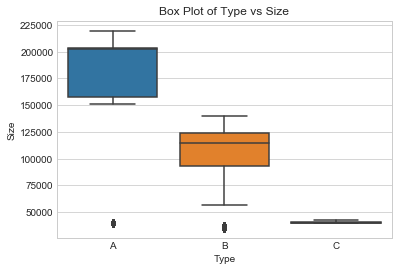

In [11]:
sns.set_style("whitegrid")
ax = sns.boxplot(x='Type', y='Size', data=train_all).set_title("Box Plot of Type vs Size")


<b>Observations -</b><br> 
1. Size are very different for different types of store.

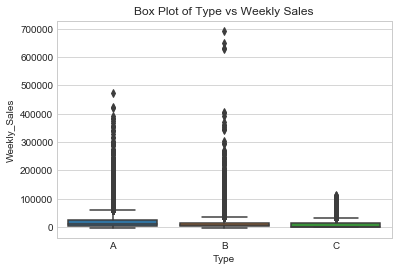

In [19]:
sns.set_style("whitegrid")
ax = sns.boxplot(x='Type', y='Weekly_Sales', data=train_all).set_title("Box Plot of Type vs Weekly Sales")


### Observations - 
1. We cannot determine the much from the box plot.
2. Here is some outliers on type B, lets analyze this.

In [71]:
train_all_new = train_all.sort_values('Weekly_Sales',ascending=False)
train_all_new = train_all_new.head(50)
train_all_new['Week'] = train_all_new['Date'].dt.week
train_all_new['Month'] = train_all_new['Date'].dt.month
train_all_new['Year'] = train_all_new['Date'].dt.year

#Pick top 100 rows
print(tabulate(train_all_new[['Store','Dept','Size','Type','Week','Month','Year','Weekly_Sales']], headers='keys', tablefmt='psql', showindex=False))

+---------+--------+--------+--------+--------+---------+--------+----------------+
|   Store |   Dept |   Size | Type   |   Week |   Month |   Year |   Weekly_Sales |
|---------+--------+--------+--------+--------+---------+--------+----------------|
|      10 |     72 | 126512 | B      |     47 |      11 |   2010 |         693099 |
|      35 |     72 | 103681 | B      |     47 |      11 |   2011 |         649770 |
|      10 |     72 | 126512 | B      |     47 |      11 |   2011 |         630999 |
|      35 |     72 | 103681 | B      |     47 |      11 |   2010 |         627963 |
|      14 |     72 | 200898 | A      |     47 |      11 |   2010 |         474330 |
|      20 |     72 | 203742 | A      |     47 |      11 |   2010 |         422306 |
|      27 |     72 | 204184 | A      |     47 |      11 |   2010 |         420587 |
|      10 |      7 | 126512 | B      |     51 |      12 |   2010 |         406989 |
|      10 |     72 | 126512 | B      |     51 |      12 |   2010 |         4

### Observations - 
1. Highest sales available on the week of Thanksgiving and week before the Christmas.
2. Most of the sales take placed in the department of 7 and 72

### Averge Weekly sales over the time

In [22]:
avg_sales = train_all.groupby('Date')[['Weekly_Sales']].mean().reset_index()
avg_sales.head()

Date  Weekly_Sales
0 2010-02-05  16836.121997
1 2010-02-12  16352.056032
2 2010-02-19  16216.658979
3 2010-02-26  14899.549688
4 2010-03-05  15921.015727

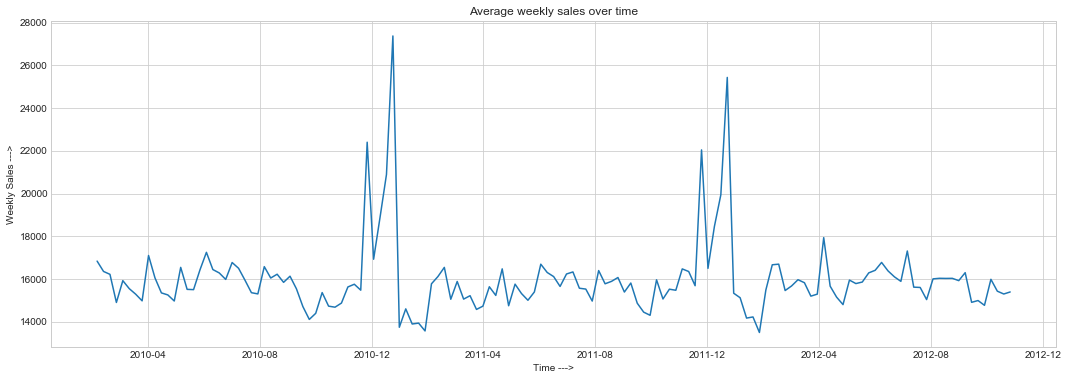

In [30]:
fig = plt.figure(figsize=(18,6))
plt.plot(avg_sales['Date'], avg_sales['Weekly_Sales'])
plt.xlabel("Time --->", fontsize=16)
plt.ylabel("Weekly Sales --->", fontsize=16)
plt.title("Average weekly sales over time", fontsize=18)
plt.show()

### Let zoom the sales number over the year

In [41]:
avg_sales = train_all.groupby('Date')[['Weekly_Sales']].agg(['mean','median']).reset_index()
avg_sales['Week'] = avg_sales['Date'].dt.week
avg_sales_2010 = avg_sales[avg_sales['Date'].dt.year == 2010]
avg_sales_2011 = avg_sales[avg_sales['Date'].dt.year == 2011]
avg_sales_2012 = avg_sales[avg_sales['Date'].dt.year == 2012]
avg_sales.head()

Date  Weekly_Sales           Week
                      mean    median     
0 2010-02-05  16836.121997  7904.690    5
1 2010-02-12  16352.056032  8365.095    6
2 2010-02-19  16216.658979  8411.250    7
3 2010-02-26  14899.549688  7235.800    8
4 2010-03-05  15921.015727  7717.975    9

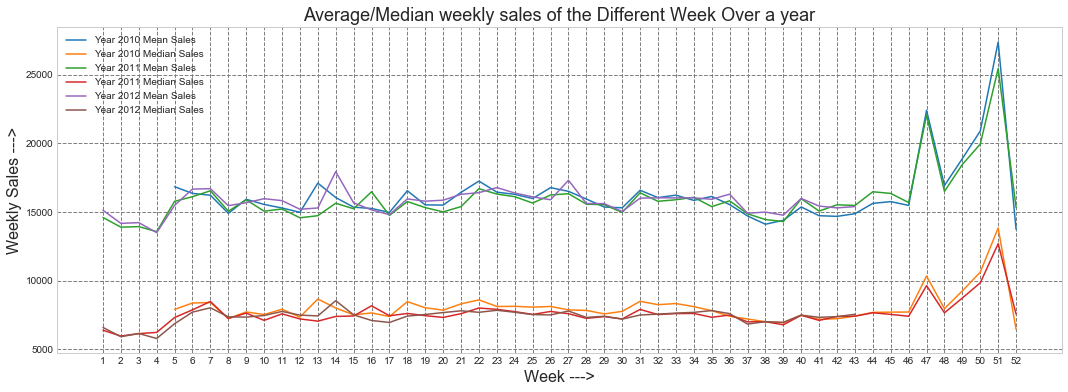

In [48]:
fig = plt.figure(figsize=(18,6))
plt.plot(avg_sales_2010['Week'], avg_sales_2010['Weekly_Sales']['mean'], label='Year 2010 Mean Sales')
plt.plot(avg_sales_2010['Week'], avg_sales_2010['Weekly_Sales']['median'], label='Year 2010 Median Sales')

plt.plot(avg_sales_2011['Week'], avg_sales_2011['Weekly_Sales']['mean'], label='Year 2011 Mean Sales')
plt.plot(avg_sales_2011['Week'], avg_sales_2011['Weekly_Sales']['median'], label='Year 2011 Median Sales')

plt.plot(avg_sales_2012['Week'], avg_sales_2012['Weekly_Sales']['mean'], label='Year 2012 Mean Sales')
plt.plot(avg_sales_2012['Week'], avg_sales_2012['Weekly_Sales']['median'], label='Year 2012 Median Sales')


plt.xticks(np.arange(1, 53, step=1))
plt.grid(axis='both',color='grey', linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("Week --->", fontsize=16)
plt.ylabel("Weekly Sales --->", fontsize=16)
plt.title("Average/Median weekly sales of the Different Week Over a year", fontsize=18)
plt.show()

<b>Observations -</b><br> 
1. The Sales Number from last November to December are much bigger than normal week.
2. The Sales number are minimum after december.
3. We can see a spike for Super Bawl.
4. In January the average sales are low.

### Now, Lets try to find the pattern of Weekly sales for some random departments. 

In [16]:
avg_sales_depart = train_all.groupby(['Date','Dept'])[['Weekly_Sales']].mean().reset_index()
avg_sales_depart.head()

Date  Dept  Weekly_Sales
0 2010-02-05     1  19596.298000
1 2010-02-05     2  44396.264222
2 2010-02-05     3  10763.753333
3 2010-02-05     4  26795.594889
4 2010-02-05     5  24821.167556

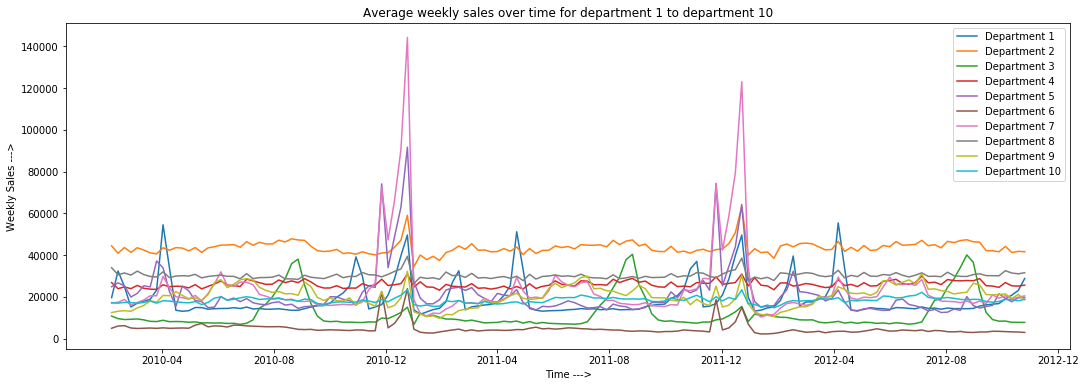

In [23]:

fig = plt.figure(figsize=(18,6))
for depart in range(1,11):
    avg_sales_depa_curr = avg_sales_depart[avg_sales_depart['Dept'] == depart]
    plt.plot(avg_sales_depa_curr['Date'], avg_sales_depa_curr['Weekly_Sales'], label='Department ' + str(depart))
    
plt.xlabel("Time --->", fontsize=16)
plt.ylabel("Weekly Sales --->", fontsize=16)
plt.title("Average weekly sales over time for department 1 to department 10",, fontsize=18) 

plt.legend()
plt.show()

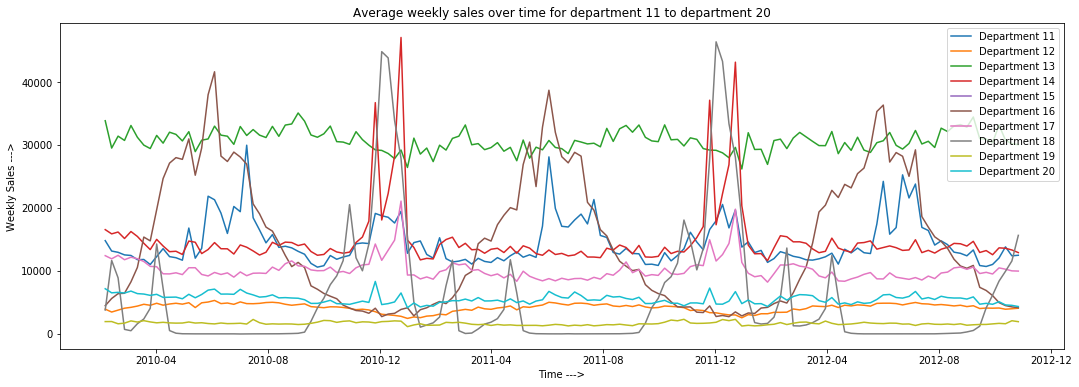

In [26]:

fig = plt.figure(figsize=(18,6))
for depart in range(11,21):
    avg_sales_depa_curr = avg_sales_depart[avg_sales_depart['Dept'] == depart]
    plt.plot(avg_sales_depa_curr['Date'], avg_sales_depa_curr['Weekly_Sales'], label='Department ' + str(depart))
    
plt.xlabel("Time --->", fontsize=16)
plt.ylabel("Weekly Sales --->", fontsize=16)
plt.title("Average weekly sales over time for department 11 to department 20",, fontsize=18)
plt.legend()
plt.show()

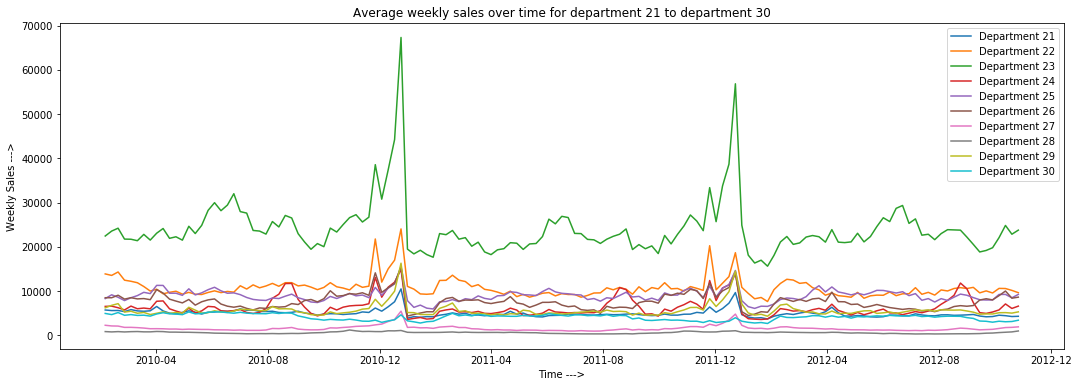

In [27]:

fig = plt.figure(figsize=(18,6))
for depart in range(21,31):
    avg_sales_depa_curr = avg_sales_depart[avg_sales_depart['Dept'] == depart]
    plt.plot(avg_sales_depa_curr['Date'], avg_sales_depa_curr['Weekly_Sales'], label='Department ' + str(depart))
    
plt.xlabel("Time --->", fontsize=16)
plt.ylabel("Weekly Sales --->", fontsize=16)
plt.title("Average weekly sales over time for department 21 to department 30", fontsize=18)
plt.legend()
plt.show()

<b>Observations -</b><br> 
1. Each Department has its own behaviour.
2. For some of the department pattern of sales number are similar to the average sales number of all departments.
3. We should have the different models for differents departments.

### Average weekly sale with store and size

In [13]:
avg_sales = train_all.groupby(['Store','Size', 'Type'])[['Weekly_Sales']].mean().reset_index()

fig = px.scatter(avg_sales, x="Store", y="Weekly_Sales",
	         size="Size", color="Type",
                 hover_name="Store", log_y=True,
                 size_max=60, title="Average Weekly Sales number with size and categoty of the store")
fig.show()

<b>Observations -</b><br> 
1. Some stores are in A or B category but the sizes of those store are leas than the size of any C category store.
2. Here we can see a broad partern that the store has more size have more sale numbers.

### Store wise Average Sales Numbers Holiday vs Non Holiday week

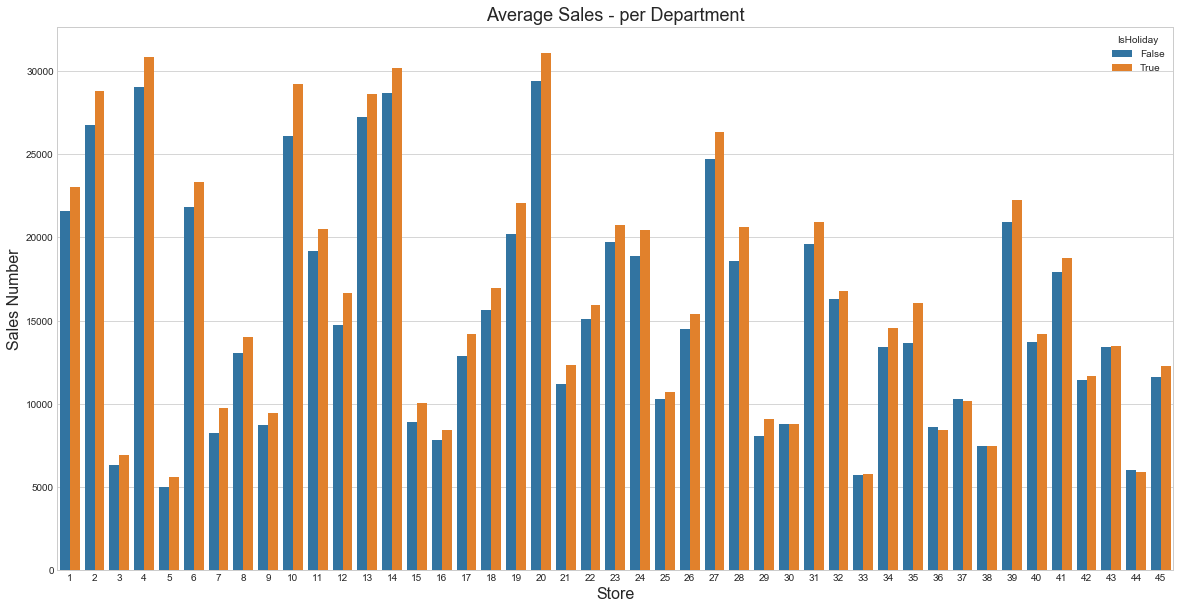

In [31]:
weekly_sales_dept = train_all.groupby(["Store","IsHoliday"])[["Weekly_Sales"]].mean().reset_index()
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Store", y="Weekly_Sales",hue="IsHoliday", data=weekly_sales_dept)
plt.title('Average Sales - per Department', fontsize=18)
plt.ylabel('Sales Number', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

<b>Observations -</b><br> 
1. Most of the stores have better sales number in the holliday week.

### Storewise average percentage sale

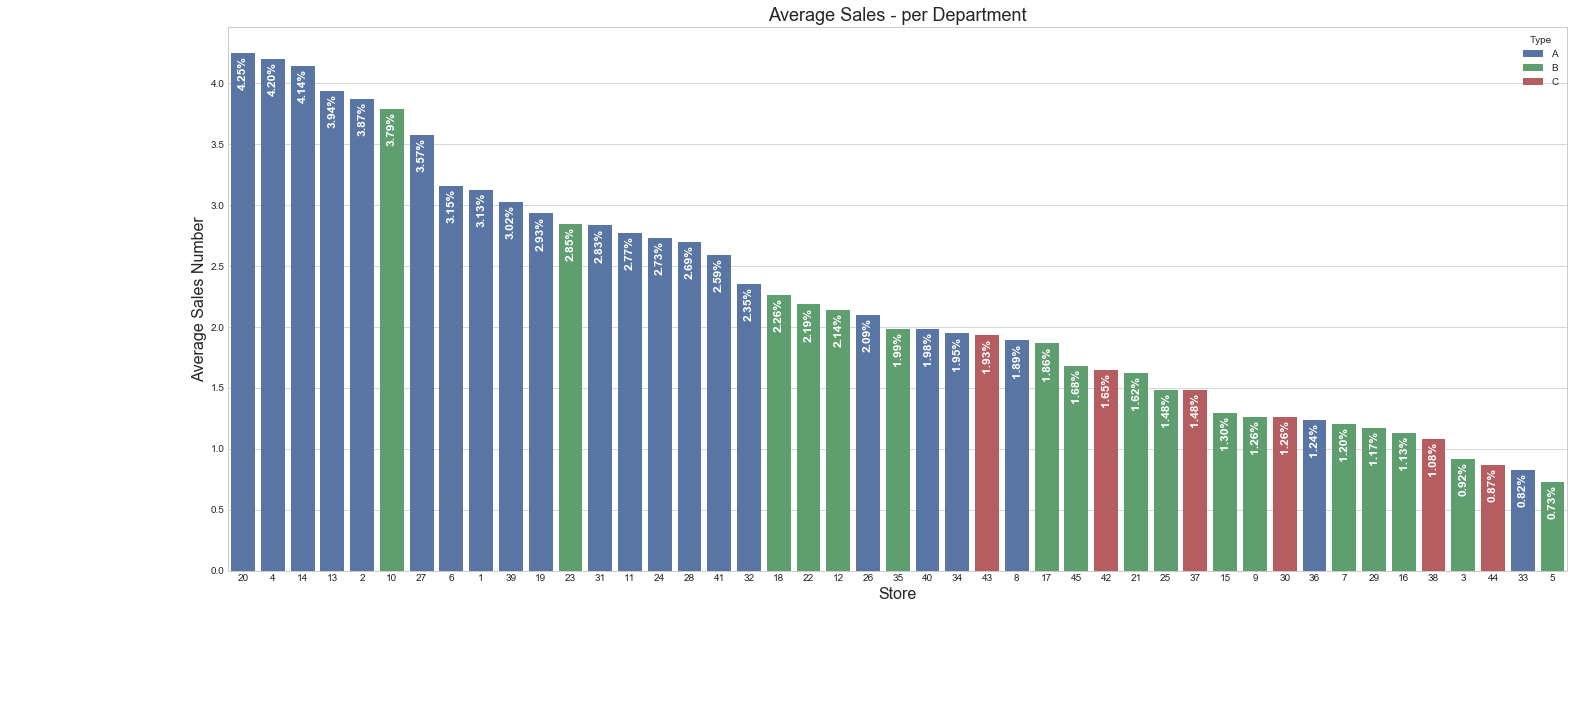

In [121]:
weekly_sales_dept = train_all.groupby(["Store", 'Type'])[["Weekly_Sales"]].mean().reset_index()
weekly_sales_mean = weekly_sales_dept["Weekly_Sales"].sum()
weekly_sales_dept['Percentage'] = weekly_sales_dept['Weekly_Sales']/weekly_sales_mean*100
weekly_sales_dept = weekly_sales_dept.sort_values('Percentage', ascending=False).reset_index()
weekly_sales_dept['Store Number'] = str(weekly_sales_dept['Store'])

plt.figure(figsize=(24,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Store", y="Percentage", data=weekly_sales_dept, palette='deep',order=weekly_sales_dept['Store'],hue='Type', dodge=False )

for p in ax.patches:
    ax.annotate(str(format(p.get_height(), '.2f'))+"%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -20),
                   rotation=90,
                   weight='bold',
                   color='white',
                   textcoords = 'offset points')
    
plt.title('Average Sales - per Department', fontsize=18)
plt.ylabel('Average Sales Number', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

### Observations - 
1. Some A category store has less average sales number than some B or C category.
2. Most of A category stores have more number than B or C category.

### Average weekly sales per Department

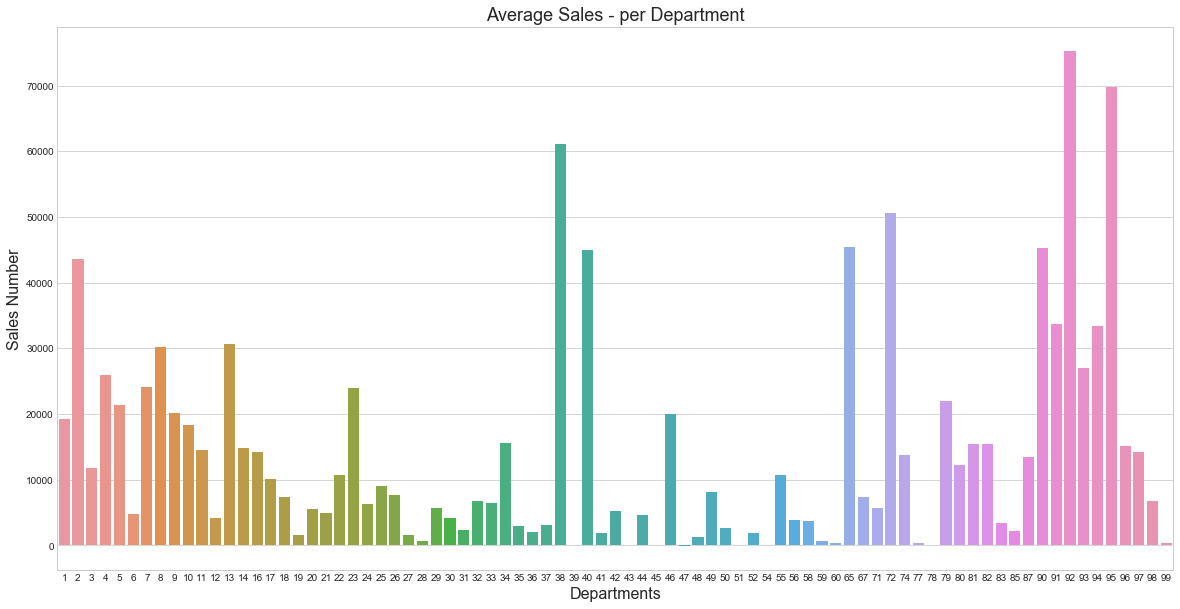

In [23]:
weekly_sales_dept = train_all.groupby(["Dept"])[["Weekly_Sales"]].mean().reset_index()
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Dept", y="Weekly_Sales", data=weekly_sales_dept)
plt.title('Average Sales - per Department', fontsize=18)
plt.ylabel('Sales Number', fontsize=16)
plt.xlabel('Departments', fontsize=16)
plt.show()

### Departmental Average Sales Numbers Holiday vs Non Holiday week

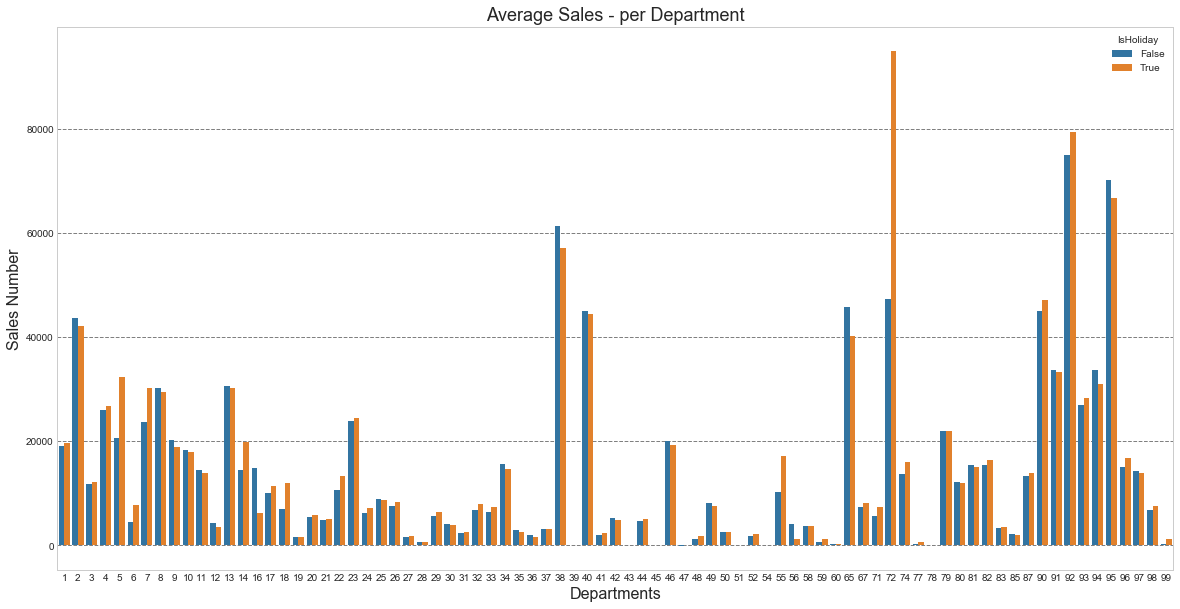

In [14]:
weekly_sales_dept = train_all.groupby(["Dept","IsHoliday"])[["Weekly_Sales"]].mean().reset_index()
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Dept", y="Weekly_Sales",hue="IsHoliday", data=weekly_sales_dept)
plt.title('Average Sales - per Department', fontsize=18)
plt.grid(axis='y',color='gray', linestyle='--', linewidth=1)
plt.ylabel('Sales Number', fontsize=16)
plt.xlabel('Departments', fontsize=16)
plt.show()

<b>Observations -</b><br> 
1. For Some departments the increase of Holiday sales are bigger than the others. 
2. But mmost of the departments the holiday sales is the range of the average sales.

### Store vs Departments

In [44]:
store_Dept = train_all.groupby(['Store'])[['Dept']].nunique().reset_index().sort_values('Dept', ascending=False)
store_Dept.head()

Store  Dept
18     19    79
14     15    79
12     13    79
19     20    78
17     18    78

<b>Observations -</b><br> 
1. Here we have a citical observation. For each store the number of departments available in that store are different. If we have a model for each store and department then there may be a issue if a new department is introduced in future.
2. We have to check that above senario is present or not in our test data.

In [10]:
store_Dept_train = train_all.groupby(['Store','Dept'])[['Weekly_Sales']].mean().reset_index()
print(store_Dept_train.shape)
store_Dept_train.head()

(3331, 3)


Store  Dept  Weekly_Sales
0      1     1  22513.322937
1      1     2  46102.090420
2      1     3  13150.478042
3      1     4  36964.154476
4      1     5  24257.941119

In [11]:
store_Dept_test = test_all.groupby(['Store','Dept'])[['Date']].min().reset_index()
print(store_Dept_test.shape)
store_Dept_test.head()

(3169, 3)


Store  Dept       Date
0      1     1 2012-11-02
1      1     2 2012-11-02
2      1     3 2012-11-02
3      1     4 2012-11-02
4      1     5 2012-11-02

In [12]:
common_dept = store_Dept_test.set_index(["Store","Dept"]).join(store_Dept_train.set_index(["Store","Dept"]), how='inner')
common_dept.reset_index(inplace=True)
common_dept.shape

(3158, 4)

<b>Observations -</b><br> 
1. There are some department and store combinations present in the test data those combinations are not present in the train data. We have to find some a solution to tackle this.

### Average Sales behaviour Over a month

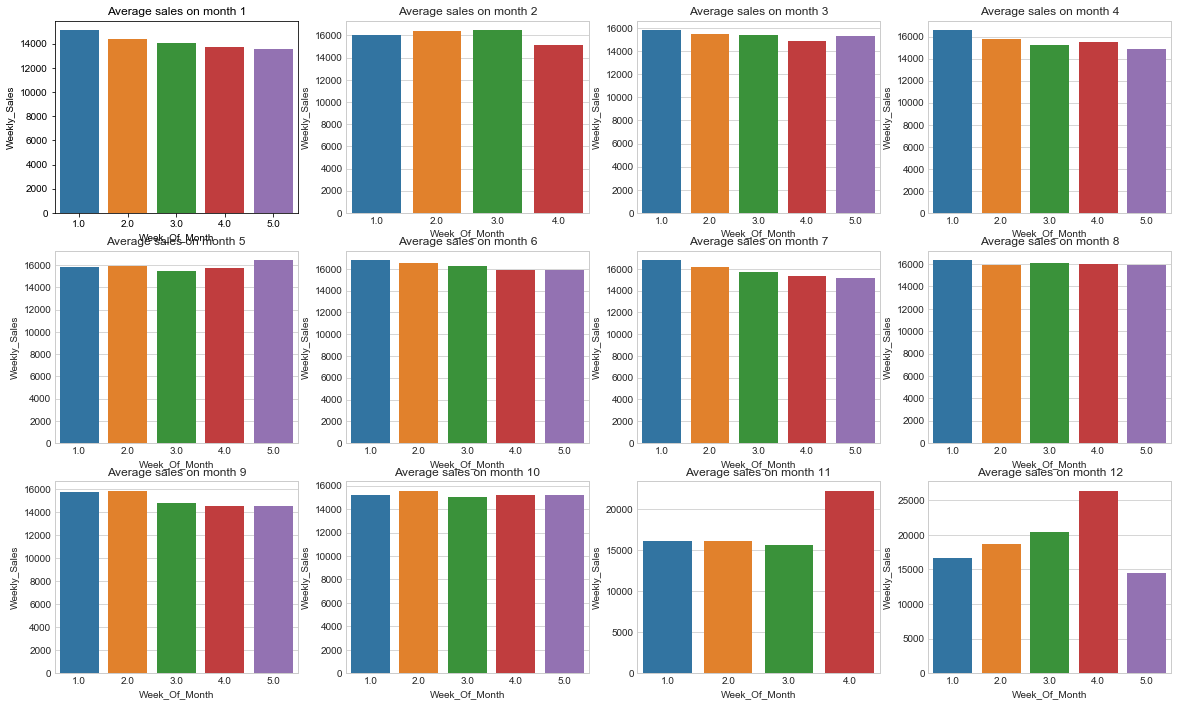

In [7]:
train_all['Month'] = train_all['Date'].dt.month
train_all['Week'] = train_all['Date'].dt.week
train_all['Week_Of_Month'] = (np.floor(train_all['Date'].dt.day/7+1))

avg_sale_week_month = train_all.groupby(['Month','Week_Of_Month'])[['Weekly_Sales']].mean().reset_index()

plt.figure(figsize=(20,12))
for k in range(1,13):
    ax = plt.subplot(3,4,k)
    avg_sale_curr = avg_sale_week_month[avg_sale_week_month['Month'] == k]
    
    sns.set_style("whitegrid")
    ax1 = sns.barplot(x="Week_Of_Month", y="Weekly_Sales", data=avg_sale_curr,ax=ax)
    ax1.set_title("Average sales on month " + str(k));
plt.show()

<b>Observations -</b><br> 
1. For most of the months first week of the month has more sales number than the last week of that months. I definitely add a feature called week of the month.
2. In November, I have seen different behaviour than other months. Last week of November has Thanksgiving day and sales number is high for this week.
3. In December, we have the Christmas holiday in the last week of the year. But sales number are prety low on this week. People did their Christmas shoping in the prior week.

### Let try to analyze the the Sales of last 2 weeks

In [8]:
train_all['Year'] = train_all['Date'].dt.year
train_all_Dec = train_all[(train_all['Month'] == 12) & ((train_all['Week'] == 51) | (train_all['Week'] == 52))]
train_all_Dec.head()

Store       Date  Dept  Weekly_Sales  IsHoliday Type    Size  \
136752     21 2010-12-24    38      36550.56      False    B  140167   
136745     14 2010-12-24    92     244628.76      False    A  200898   
136746     38 2010-12-24    98       6740.04      False    C   39690   
136747     21 2010-12-24    98         13.61      False    B  140167   
136748     21 2010-12-24    97       3096.60      False    B  140167   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
136752        51.29       2.886        0.0        0.0        0.0        0.0   
136745        30.59       3.141        0.0        0.0        0.0        0.0   
136746        52.02       3.236        0.0        0.0        0.0        0.0   
136747        51.29       2.886        0.0        0.0        0.0        0.0   
136748        51.29       2.886        0.0        0.0        0.0        0.0   

        MarkDown5         CPI  Unemployment  Month  Week  Week_Of_Month  Year  
136752        0.0  211.064660         8.163     12    51            4.0  2010  
136745        0.0  182.544590         8.724     12    51            4.0  2010  
136746        0.0  126.983581        14.313     12    51            4.0  2010  
136747        0.0  211.064660         8.163     12    51            4.0  2010  
136748        0.0  211.064660         8.163     12    51            4.0  2010

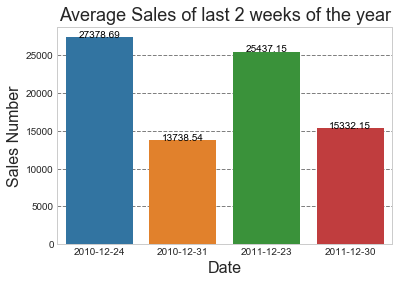

In [16]:
train_all_Dec_grp1 = train_all_Dec.groupby('Date')[['Weekly_Sales']].mean().reset_index()
train_all_Dec_grp1['Date2'] = train_all_Dec_grp1['Date'].apply(lambda x  : str(x.year) + "-" + str(x.month)+"-"+str(x.day))
sns.set_style("whitegrid")
ax = sns.barplot(x="Date2", y="Weekly_Sales", data=train_all_Dec_grp1)
for index, row in train_all_Dec_grp1.iterrows():
    ax.text(row.name,row.Weekly_Sales, round(row.Weekly_Sales,2), color='black', ha="center")
plt.title('Average Sales of last 2 weeks of the year', fontsize=18)
plt.grid(axis='y',color='gray', linestyle='--', linewidth=1)
plt.ylabel('Sales Number', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()


<b>Observations -</b><br/>
1. In 2010, there are no days between the second last week and the Christmas day but in 2011, there is one day. This is one of the reason to have bigger last week sales number in 2011 comapre to 2010.
2. Sum of sales number of the last 2 week of a year has similar number. 

### Let try to find which week have better sales.

In [19]:
#Create Some New Columns
train_all['Year'] = train_all['Date'].dt.year
train_all['Week'] = train_all['Date'].dt.week
train_all['Week_Of_Month'] = (np.floor(train_all['Date'].dt.day/7+1))

#Generating Percentage of total sales of the year for each week 
train_all_grp1 = train_all.groupby(['Date','Year','Week','Week_Of_Month','IsHoliday'])[['Weekly_Sales']].sum().reset_index()
train_all_grp2 = train_all.groupby('Year')[['Weekly_Sales']].sum().reset_index()
train_all_grp2['Weekly_Sales_Yearly'] = train_all_grp2['Weekly_Sales']
train_all_grp2.drop('Weekly_Sales',axis=1, inplace=True)
train_all_grp1 = train_all_grp1.set_index("Year").join(train_all_grp2.set_index("Year")).reset_index()
train_all_grp1['%age_of_yearly_Sales'] = train_all_grp1['Weekly_Sales']/train_all_grp1['Weekly_Sales_Yearly']*100
train_all_grp1['Week/Is_Holiday'] = train_all_grp1.apply(lambda x: str(x['Week']) +"/"+ str(x['IsHoliday']), axis=1)

#Taking the pivot
train_pivot = train_all_grp1.pivot(index='Week/Is_Holiday', columns='Year', values='%age_of_yearly_Sales').reset_index()

#replace NaN value
train_pivot[2010] = train_pivot.apply(lambda x: 0.5*(x[2011] + x[2012]) if np.isnan(x[2010]) else x[2010], axis=1)
train_pivot[2012] = train_pivot.apply(lambda x: 0.5*(x[2011] + x[2010]) if np.isnan(x[2012]) else x[2012], axis=1)

#Taking the average of percentage of each year
train_pivot['Percentage_Average'] = train_pivot.apply(lambda x: (1.0/3)*(x[2010] + x[2011] + x[2012]), axis=1)
train_pivot.sort_values('Percentage_Average',inplace=True, ascending=False)

print(tabulate(train_pivot, headers='keys', tablefmt='psql', showindex=False))

+-------------------+---------+---------+---------+----------------------+
| Week/Is_Holiday   |    2010 |    2011 |    2012 |   Percentage_Average |
|-------------------+---------+---------+---------+----------------------|
| 51/False          | 3.53584 | 3.1451  | 3.34047 |              3.34047 |
| 47/True           | 2.87568 | 2.7201  | 2.79789 |              2.79789 |
| 50/False          | 2.70091 | 2.45428 | 2.5776  |              2.5776  |
| 49/False          | 2.43205 | 2.26947 | 2.35076 |              2.35076 |
| 14/False          | 2.06936 | 1.87433 | 2.67494 |              2.20621 |
| 27/False          | 2.0927  | 1.95488 | 2.56248 |              2.20335 |
| 7/False           | 2.10919 | 1.98988 | 2.50969 |              2.20292 |
| 22/False          | 2.19271 | 1.99216 | 2.41392 |              2.1996  |
| 6/True            | 2.1118  | 1.93351 | 2.5003  |              2.18187 |
| 23/False          | 2.08951 | 1.94713 | 2.48239 |              2.17301 |
| 31/False          | 2.1

### Observations
1. We have seen that the most sales take placed on the second last week of a year.
2. The last week(the Christmas week) has one of the lowest sale week althrough it has a holiday. For the Christmas day people are will to buy the product in the previous week.
3. Thanks giving week(week 47) has second highest sale number. It is a impportant week in term of sales.

In [21]:
def labelHoliday(x):
    all_holiday = {6 : 'Super Bowl',36: 'Labour Day', 47: 'ThanksGiving', 52 : 'Christmas'}
    if x['Week'] in all_holiday.keys():
        return all_holiday[x['Week']]
    elif (x['Week'] + 1) in all_holiday.keys():
        return all_holiday[x['Week']+1]
    elif (x['Week'] - 1) in all_holiday.keys():
        return all_holiday[x['Week']-1]
    elif x['Week'] == 1:
        return all_holiday[52]
    else:
        return 'No Holiday'
    
def preOrPost(x):
    all_holiday = {6 : 'Super Bowl',36: 'Labour Day', 47: 'ThanksGiving', 52 : 'Christmas'}
    if x['Week'] in all_holiday.keys():
        return 'HolidayWeek'
    elif (x['Week'] + 1) in all_holiday.keys():
        return 'PreWeek'
    elif (x['Week'] - 1) in all_holiday.keys():
        return 'PostWeek'
    elif x['Week'] == 1:
        return 'PostWeek'
    else:
        return 'No Holiday'
        

In [30]:
train_all[train_all['IsHoliday'] == True]['Week'].unique()

array([ 6, 36, 47, 52], dtype=int64)

In [22]:
train_all['Year'] = train_all['Date'].dt.year
train_all['Week'] = train_all['Date'].dt.week

all_holiday_week = train_all[train_all['IsHoliday'] == True]['Week'].unique()
train_all_filtered = train_all[train_all['Week'].isin(all_holiday_week) | (train_all['Week']+1).isin(all_holiday_week) |(train_all['Week'] == 1) | (train_all['Week']-1).isin(all_holiday_week)]
filtered_week_sum = train_all_filtered.groupby('Week')[['Weekly_Sales']].mean().reset_index()
#train_all_filtered['Week'].unique()
all_holiday = ['Super Bowl','Labour Day', 'ThanksGiving', 'Christmas']
filtered_week_sum['HolidayCat'] = filtered_week_sum.apply(labelHoliday,axis=1)
filtered_week_sum['PreOrPost'] = filtered_week_sum.apply(preOrPost,axis=1)
#Taking the pivot
train_pivot = filtered_week_sum.pivot(index='HolidayCat', columns='PreOrPost', values='Weekly_Sales').reset_index()
train_pivot['Percentage_Sale_Increase_From_PreviousWeek'] = train_pivot.apply(lambda x: 100*(x['HolidayWeek'] - x['PreWeek'])/x['HolidayWeek'], axis=1)
train_pivot['Percentage_Sale_Decrease_In_PostWeek'] = train_pivot.apply(lambda x: 100*(x['HolidayWeek'] - x['PostWeek'])/x['HolidayWeek'], axis=1)
print(tabulate(train_pivot[['HolidayCat','Percentage_Sale_Increase_From_PreviousWeek','Percentage_Sale_Decrease_In_PostWeek']], headers='keys', tablefmt='psql', showindex=False))

+--------------+----------------------------------------------+----------------------------------------+
| HolidayCat   |   Percentage_Sale_Increase_From_PreviousWeek |   Percentage_Sale_Decrease_In_PostWeek |
|--------------+----------------------------------------------+----------------------------------------|
| Christmas    |                                   -81.501    |                              -2.19173  |
| Labour Day   |                                     0.438916 |                               6.64066  |
| Super Bowl   |                                     2.12773  |                              -0.650363 |
| ThanksGiving |                                    29.8853   |                              24.8067   |
+--------------+----------------------------------------------+----------------------------------------+


### Observation
1. For Christmas Week, poeple are made their shpoing in prior week. 
2. ThanksGiving week has almost 30% sales jump compare to the previous week and almost 25% sale decrease in the post week.

### Find the importance of Fuel price

In [87]:
train_all['Month'] = train_all['Date'].dt.month
def CalculateAverege(column, plot_type,k):
    groupby_month = train_all.groupby('Month')[[column,'Weekly_Sales']].mean().reset_index().sort_values(column)
    month = 0
    median = groupby_month.loc[:,column].median();
    groupby_month['diff'] = abs(groupby_month[column] - median)
    if plot_type == 'high':
        month = groupby_month[groupby_month[column] == groupby_month[column].max()].reset_index(drop=True).iloc[0,0]
    elif plot_type == 'min':
        month = groupby_month[groupby_month[column] == groupby_month[column].min()].reset_index(drop=True).iloc[0,0]
    elif plot_type == 'median':
        month = groupby_month[groupby_month['diff'] == groupby_month['diff'].min()].reset_index(drop=True).iloc[0,0]
    
    pre_month = (month-1) if (month-1)>0 else 12
    
    ax = plt.subplot(1,3,k)
    pre_row = groupby_month[groupby_month['Month'] == pre_month].reset_index()
    curr_row = groupby_month[groupby_month['Month'] == month].reset_index()
    
    col_increase = 100*(curr_row.loc[0,column] - pre_row.loc[0,column])/curr_row.loc[0,column]
    sale_increase = 100*(curr_row.loc[0,'Weekly_Sales'] - pre_row.loc[0,'Weekly_Sales'])/curr_row.loc[0,'Weekly_Sales']

    ax1 = sns.barplot(x=[column + ' increase', 'Weekly Sale increase'], y=[col_increase,sale_increase], ax=ax)
    
    for p in ax1.patches:
        offset = -20
        if p.get_height()< 0 :
            offset = 20
        ax1.annotate(str(format(p.get_height(),'.2f') + "%"),(p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=12,weight='bold',xytext = (0, offset),
                   textcoords = 'offset points' )
    
    return month
    #return groupby_month

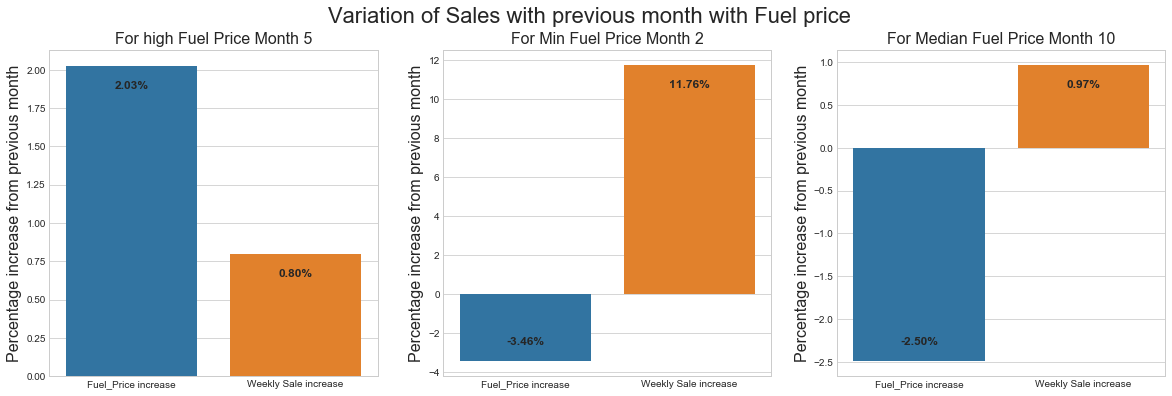

In [88]:

fig = plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
col = 'Fuel_Price'
m = CalculateAverege(col, 'high', 1)
plt.title("For high Fuel Price Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
m = CalculateAverege(col, 'min', 2)
plt.title("For Min Fuel Price Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
m = CalculateAverege(col, 'median', 3)
plt.title("For Median Fuel Price Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
fig.suptitle("Variation of Sales with previous month with Fuel price",fontsize = 22)

plt.show()


### Observations
1. We have seen that average weekly sales are increased from previous month irrespective of fuel price.
2. In minimum fuel price month, price down by 3.5 percent and sale was increased by 11.8 percent. There may be reason of fuel price decrese. We have to consider that this month has a holiday.

### Find the importance of Temperature

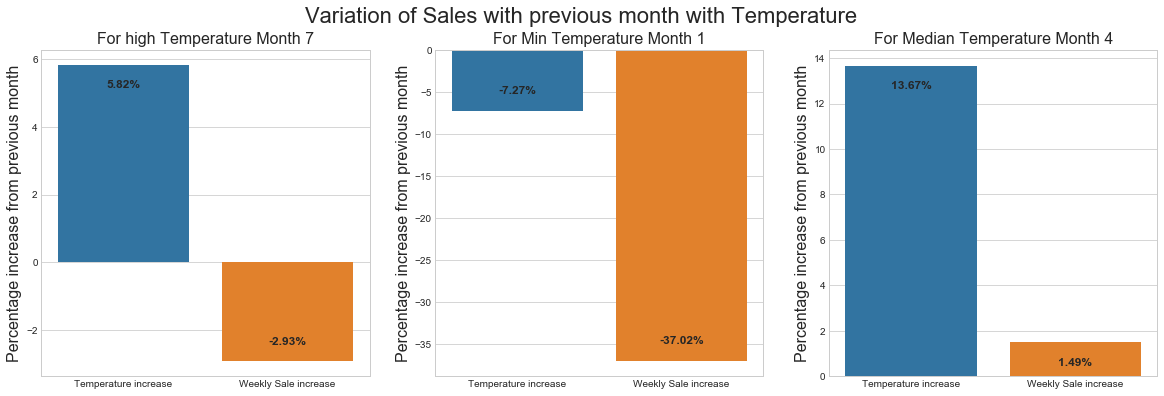

In [89]:

fig = plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
col = 'Temperature'
m = CalculateAverege(col, 'high', 1)
plt.title("For high Temperature Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
m = CalculateAverege(col, 'min', 2)
plt.title("For Min Temperature Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
m = CalculateAverege(col, 'median', 3)
plt.title("For Median Temperature Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
fig.suptitle("Variation of Sales with previous month with Temperature",fontsize = 22)

plt.show()


### Observations -
1. For Minimum temperature mmonth there is a huge decrease in sales compare to the previous month.
2. When temperature is high then also the sales number is low compare to the previous monnth.

### Find the importance of CPI

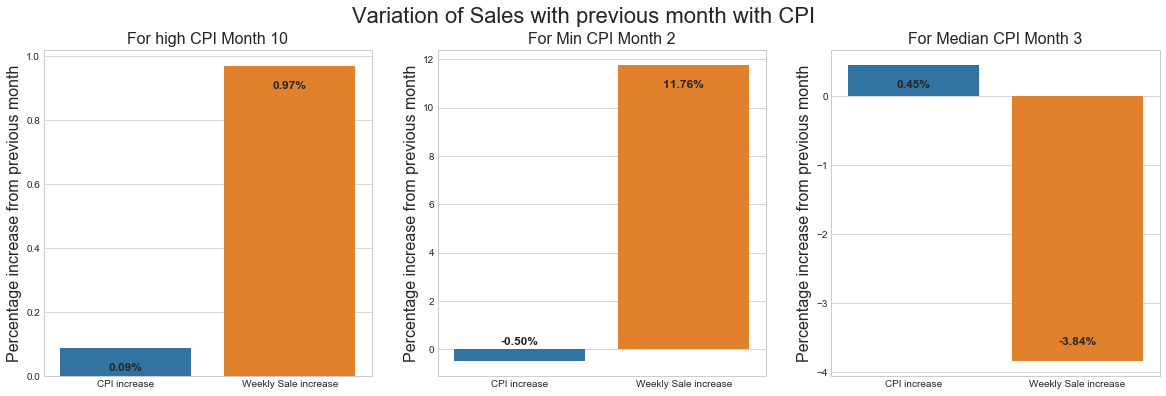

In [90]:

fig = plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
col = 'CPI'
m = CalculateAverege(col, 'high', 1)
plt.title("For high CPI Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
m = CalculateAverege(col, 'min', 2)
plt.title("For Min CPI Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
m = CalculateAverege(col, 'median', 3)
plt.title("For Median CPI Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
fig.suptitle("Variation of Sales with previous month with CPI",fontsize = 22)

plt.show()


### Observarions - 
1. There is not much varation in CPI. It seems that the Sales number is not dependent to CPI. 

### Find the importance of Unemployment Rate

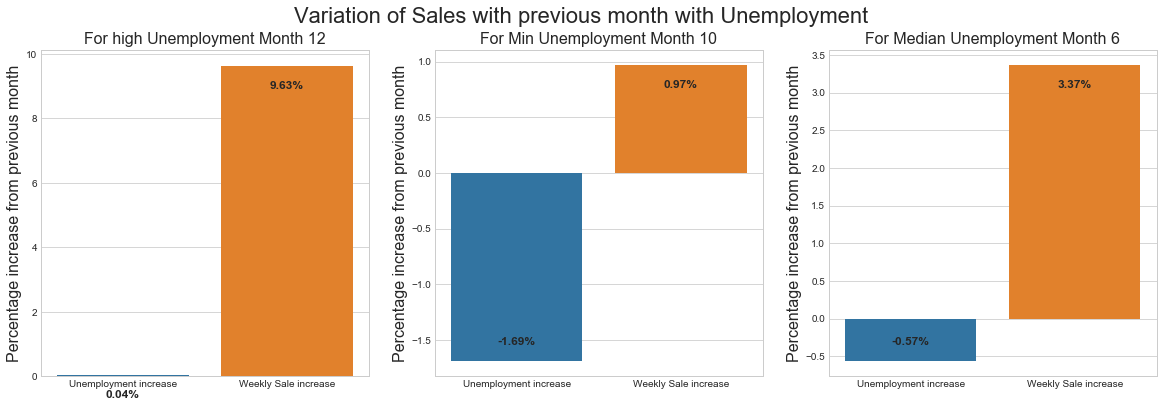

In [91]:

fig = plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
col = 'Unemployment'
m = CalculateAverege(col, 'high', 1)
plt.title("For high Unemployment Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
m = CalculateAverege(col, 'min', 2)
plt.title("For Min Unemployment Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
m = CalculateAverege(col, 'median', 3)
plt.title("For Median Unemployment Month " + str(m),fontsize = 16)
plt.ylabel("Percentage increase from previous month",fontsize = 16)
fig.suptitle("Variation of Sales with previous month with Unemployment",fontsize = 22)

plt.show()


### Observarions - 
1. The max unemployment rate in December and in this month, huge sale increase in December compare ro the previous month.

### Find the correlation between different features 

In [53]:
#Lets add two feature Year and Week of year
train_all['Year'] = train_all['Date'].dt.year
train_all['Week'] = train_all['Date'].dt.week
train_all['Month'] = train_all['Date'].dt.month

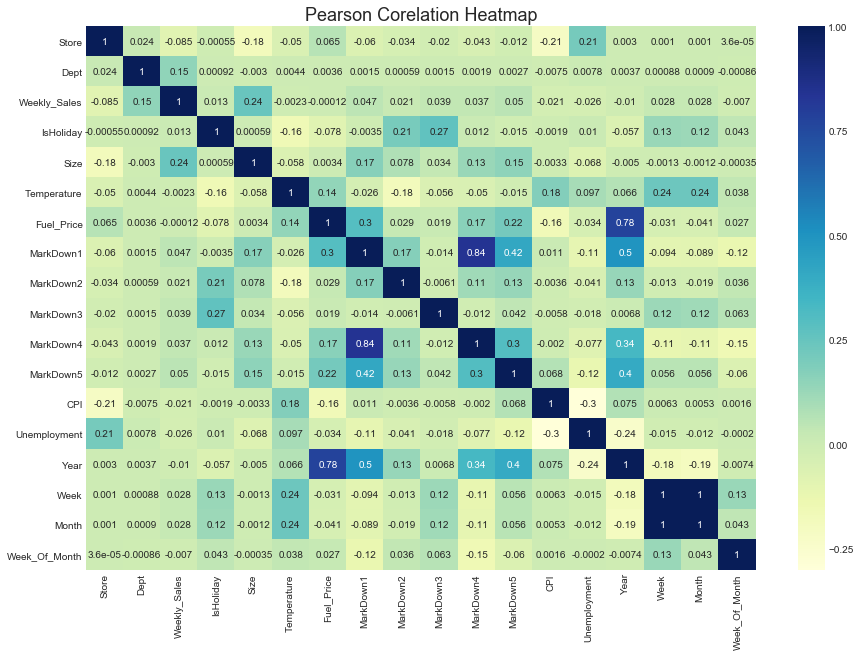

In [10]:
corr = train_all.corr()
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.plot()
plt.title("Pearson Corelation Heatmap", fontsize=18)
plt.show()

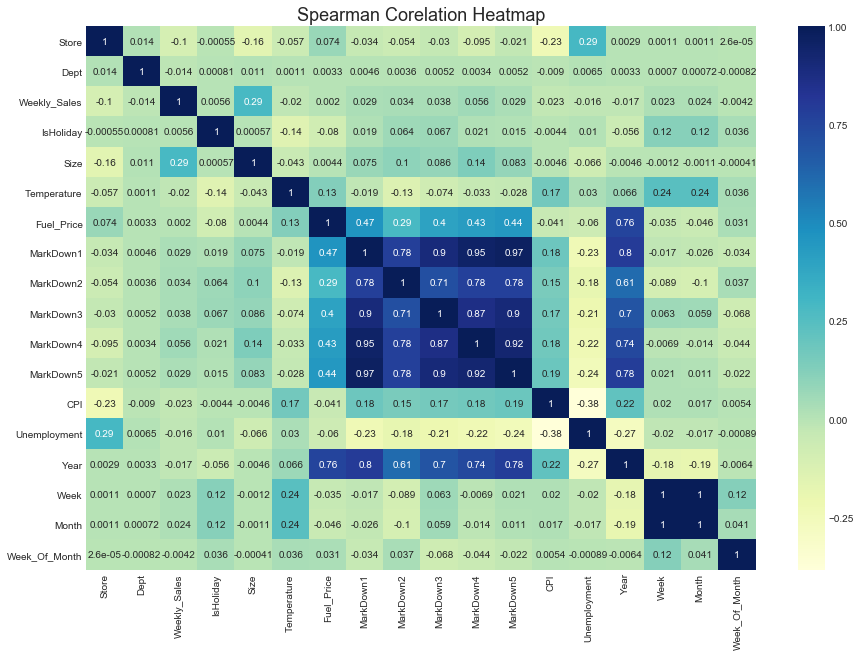

In [11]:
corr = train_all.corr(method="spearman")
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.plot()
plt.title("Spearman Corelation Heatmap", fontsize=18)
plt.show()

<b>Observations - </b><br>
1. There are very low correlations with the Sales number and also those column has more than 60 percent. So we can drop these column.
2. Fuel price has very strong correlation with Year. We can drop this columns.
3. All feature like temperature, Fuel price, CPI and Unemployment rate has very week correlations with the sale number. 

In [12]:
train_all.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1, inplace=True)
train_all.head()

Store       Date  Dept  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1 2010-02-05     1      24924.50      False    A  151315        42.31   
1     35 2010-02-05     3      14612.19      False    B  103681        27.19   
2     35 2010-02-05     4      26323.15      False    B  103681        27.19   
3     35 2010-02-05     5      36414.63      False    B  103681        27.19   
4     35 2010-02-05     6      11437.81      False    B  103681        27.19   

   Fuel_Price         CPI  Unemployment  
0       2.572  211.096358         8.106  
1       2.784  135.352461         9.262  
2       2.784  135.352461         9.262  
3       2.784  135.352461         9.262  
4       2.784  135.352461         9.262

## Calculate Multicollinearity of Various features -  

In [56]:
train_all_X = train_all.drop(['Weekly_Sales','Type','Date','IsHoliday','Week','Week_Of_Month','Month'], axis=1)
train_all_X.head()

Store  Dept    Size  Temperature  Fuel_Price         CPI  Unemployment  \
0      1     1  151315        42.31       2.572  211.096358         8.106   
1     35     3  103681        27.19       2.784  135.352461         9.262   
2     35     4  103681        27.19       2.784  135.352461         9.262   
3     35     5  103681        27.19       2.784  135.352461         9.262   
4     35     6  103681        27.19       2.784  135.352461         9.262   

   Year  
0  2010  
1  2010  
2  2010  
3  2010  
4  2010

In [57]:
factors = pd.DataFrame()
factors["VIF"] = [variance_inflation_factor(train_all_X.values, i) for i in range(train_all_X.shape[1])]
factors["FeatureName"] = train_all_X.columns
factors

VIF   FeatureName
0    4.476620         Store
1    3.108919          Dept
2    6.280930          Size
3   12.898767   Temperature
4   59.478201    Fuel_Price
5   24.967641           CPI
6   22.668663  Unemployment
7  144.031617          Year

### Observations
1. We can found that the Year and Fuel_Price have a high VIF value, meaning they can be predicted by other independent variables in the dataset.

### Lets try to remove year and re-run the Variance Inflation Factor 

In [42]:
train_all_X = train_all_X.drop(['Year'], axis=1)
factors2 = pd.DataFrame()
factors2["VIF"] = [variance_inflation_factor(train_all_X.values, i) for i in range(train_all_X.shape[1])]
factors2["FeatureName"] = train_all_X.columns
factors2

VIF    FeatureName
0   4.374305          Store
1   3.069061           Dept
2   5.909755           Size
3  13.790806    Temperature
4  30.948148     Fuel_Price
5  15.570186            CPI
6  16.589749   Unemployment
7   4.595082           Week
8   5.748437  Week_Of_Month

### Observations
1. We can still found that Fuel_Price has a high VIF value, meaning it can be predicted by other independent variables in the dataset.

### Lets try to remove Fuel_Price and re-run the Variance Inflation Factor 

In [43]:
train_all_X = train_all_X.drop(['Fuel_Price'], axis=1)
factors2 = pd.DataFrame()
factors2["VIF"] = [variance_inflation_factor(train_all_X.values, i) for i in range(train_all_X.shape[1])]
factors2["FeatureName"] = train_all_X.columns
factors2

VIF    FeatureName
0   4.140972          Store
1   3.031444           Dept
2   5.489515           Size
3  12.857565    Temperature
4  13.463700            CPI
5  14.278344   Unemployment
6   4.590285           Week
7   5.570033  Week_Of_Month

### Observations
1. We can found that Temperature,CPI,Unemployment have similar VIF values. Lets remove these columns one by one.

### Lets try to remove Unemployment and re-run the Variance Inflation Factor 

In [44]:
train_all_X = train_all_X.drop(['Unemployment'], axis=1)
factors2 = pd.DataFrame()
factors2["VIF"] = [variance_inflation_factor(train_all_X.values, i) for i in range(train_all_X.shape[1])]
factors2["FeatureName"] = train_all_X.columns
factors2

VIF    FeatureName
0   3.455056          Store
1   2.986193           Dept
2   5.172522           Size
3  11.399702    Temperature
4  13.081513            CPI
5   4.584778           Week
6   5.408760  Week_Of_Month

In [45]:
train_all_X = train_all_X.drop(['CPI'], axis=1)
factors2 = pd.DataFrame()
factors2["VIF"] = [variance_inflation_factor(train_all_X.values, i) for i in range(train_all_X.shape[1])]
factors2["FeatureName"] = train_all_X.columns
factors2

VIF    FeatureName
0  3.407864          Store
1  2.909113           Dept
2  4.605238           Size
3  8.240542    Temperature
4  4.567318           Week
5  5.117323  Week_Of_Month

In [46]:
train_all_X = train_all_X.drop(['Temperature'], axis=1)
factors2 = pd.DataFrame()
factors2["VIF"] = [variance_inflation_factor(train_all_X.values, i) for i in range(train_all_X.shape[1])]
factors2["FeatureName"] = train_all_X.columns
factors2

VIF    FeatureName
0  3.195651          Store
1  2.800467           Dept
2  4.117118           Size
3  3.868805           Week
4  4.719905  Week_Of_Month

### Observations
1. Now we have vif values less than 5. These means the features are moderately correlated

## Lets try to plot pearson and spearman correlation matrix.

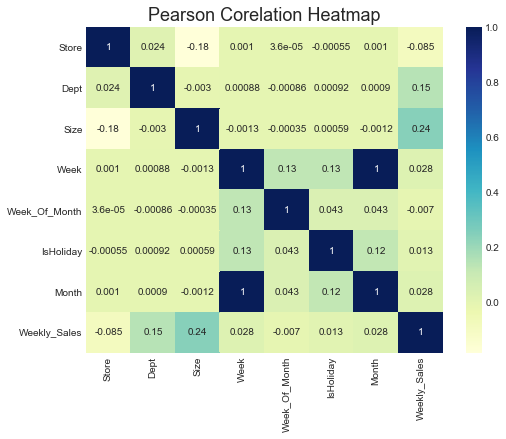

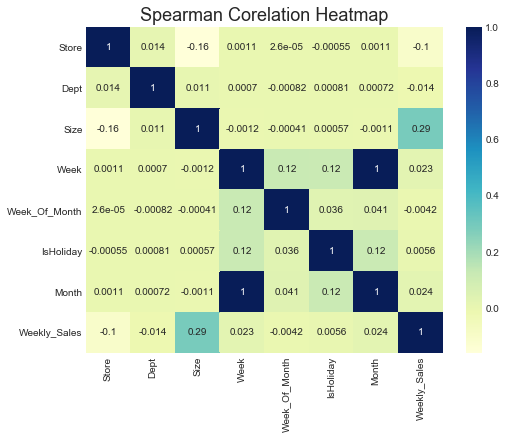

In [59]:
train_all_new = train_all[['Store','Dept','Size','Week','Week_Of_Month','Type','Date','IsHoliday','Month','Weekly_Sales']]
corr = train_all_new.corr()
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.plot()
plt.title("Pearson Corelation Heatmap", fontsize=18)
plt.show()
corr = train_all_new.corr(method="spearman")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.plot()
plt.title("Spearman Corelation Heatmap", fontsize=18)
plt.show()

### Observations - 
1. Now we have very small dataset to work and very less correlated with each other except month and week